In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV


In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
df = pd.read_csv("/content/Drive/MyDrive/context awareness datasets/shipment tracking dataset/data.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:

sizes = df['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


([<matplotlib.patches.Wedge at 0x7f14bcf31390>,
 [Text(-0.3290237775458344, 1.0496396304491695, ''),
  Text(0.3290237775458339, -1.0496396304491697, '')],
 [Text(-0.17946751502500058, 0.5725307075177288, '59.7%'),
  Text(0.17946751502500027, -0.5725307075177289, '40.3%')])

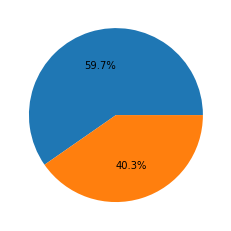

In [ ]:
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.drop(['ID'], axis=1, inplace=True)

df.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
5,F,Flight,3,1,162,3,medium,F,12,1417,1
6,D,Flight,3,4,250,3,low,F,3,2371,1
7,F,Flight,4,1,233,2,low,F,48,2804,1
8,A,Flight,3,4,150,3,low,F,11,1861,1
9,B,Flight,3,2,164,3,medium,F,29,1187,1


In [ ]:
df_reached = df[df['Reached.on.Time_Y.N'] == 0]
df_not_reached = df[df['Reached.on.Time_Y.N'] == 1]

In [ ]:
df_reached_downsampled = resample(df_reached,replace=False,n_samples=4000,random_state=25) 
df_not_reached_downsampled = resample(df_not_reached,replace=False,n_samples=4000,random_state=25) 

In [ ]:
df_downsampled = pd.concat([df_not_reached_downsampled,df_reached_downsampled])
print(len(df_downsampled))

8000


In [1]:

sizes = df_downsampled['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)
#plt.pie(sizes, autopct='%1.1f%%')

NameError: ignored

In [ ]:
df_downsampled.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2554,C,Ship,5,5,264,3,medium,F,23,2837,1
2529,B,Ship,2,1,255,3,low,M,19,1551,1
1073,F,Road,3,1,148,2,medium,M,34,1053,1
9432,D,Road,6,3,271,4,low,F,2,1364,1
2539,F,Ship,2,5,252,2,low,F,21,2070,1
10650,D,Ship,4,4,239,3,medium,F,7,5297,1
1377,B,Flight,4,3,258,2,high,M,11,2252,1
7252,C,Road,5,4,257,3,medium,F,3,4895,1
1170,D,Ship,5,1,198,5,medium,F,49,3187,1
10574,A,Ship,3,2,144,4,medium,M,8,4867,1


In [ ]:
df_downsampled.Product_importance[df_downsampled.Product_importance == 'low'] = 1
df_downsampled.Product_importance[df_downsampled.Product_importance == 'medium'] = 2
df_downsampled.Product_importance[df_downsampled.Product_importance == 'high'] = 3

df_downsampled.Gender[df_downsampled.Gender == 'F'] = 0
df_downsampled.Gender[df_downsampled.Gender == 'M'] = 1



In [ ]:
df_downsampled.head(10)

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2554,C,Ship,5,5,264,3,2,0,23,2837,1
2529,B,Ship,2,1,255,3,1,1,19,1551,1
1073,F,Road,3,1,148,2,2,1,34,1053,1
9432,D,Road,6,3,271,4,1,0,2,1364,1
2539,F,Ship,2,5,252,2,1,0,21,2070,1
10650,D,Ship,4,4,239,3,2,0,7,5297,1
1377,B,Flight,4,3,258,2,3,1,11,2252,1
7252,C,Road,5,4,257,3,2,0,3,4895,1
1170,D,Ship,5,1,198,5,2,0,49,3187,1
10574,A,Ship,3,2,144,4,2,1,8,4867,1


In [ ]:
df_encoded=pd.get_dummies(df_downsampled,columns=['Warehouse_block','Mode_of_Shipment'])
df_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
2554,5,5,264,3,2,0,23,2837,1,0,0,1,0,0,0,0,1
2529,2,1,255,3,1,1,19,1551,1,0,1,0,0,0,0,0,1
1073,3,1,148,2,2,1,34,1053,1,0,0,0,0,1,0,1,0
9432,6,3,271,4,1,0,2,1364,1,0,0,0,1,0,0,1,0
2539,2,5,252,2,1,0,21,2070,1,0,0,0,0,1,0,0,1


en fonction du coût du produit, nous diviserons nos 4 sous-ensembles comme suit:

1.sous-ensemble 1: [96,150]

2.sous-ensemble 2: [151,200]

3.sous-ensemble 3: [201,250]

4.sous-ensemble 4: [251,310]


In [ ]:
df1=df_encoded.loc[df['Cost_of_the_Product'] <=150]
df2=df_encoded.loc[(df['Cost_of_the_Product'] >150 ) & (df['Cost_of_the_Product'] <=200)]
df3=df_encoded.loc[(df['Cost_of_the_Product'] >200 ) & (df['Cost_of_the_Product'] <=250)]
df4=df_encoded.loc[df['Cost_of_the_Product'] >250]

In [ ]:
print(len(df1))
print(len(df2))
print(len(df3))
print(len(df4))

1080
2277
2590
2053


In [ ]:
X1 = df1.drop("Reached.on.Time_Y.N", axis = 1)
Y1 = df1['Reached.on.Time_Y.N']

X2 = df2.drop("Reached.on.Time_Y.N", axis = 1)
Y2 = df2['Reached.on.Time_Y.N']

X3 = df3.drop("Reached.on.Time_Y.N", axis = 1)
Y3 = df3['Reached.on.Time_Y.N']

X4 = df4.drop("Reached.on.Time_Y.N", axis = 1)
Y4 = df4['Reached.on.Time_Y.N']

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=42,shuffle = True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.2, random_state=42,shuffle = True)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.2, random_state=42,shuffle = True)

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, Y4, test_size=0.2, random_state=42,shuffle = True)

Après avoir préparé mes données pour de nombreux modèles, nous allons maintenant créer ces modèles et essayer d'optimiser chacun d'eux en utilisant la validation croisée 

***
***

# 1. Formation et optimisation du premier modèle: 

In [ ]:
model1=DecisionTreeClassifier()

In [ ]:
model1.fit(X_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test1 = model1.predict(X_test1)

In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test1, prediction_test1))

Accuracy =  0.7407407407407407


In [ ]:
#validation croisée 
param_grid = [
              {'max_depth' : list(range(2,99)),
               'criterion' :['gini', 'entropy']},
                       
                       ]

In [ ]:
optimal_params1 = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=50,
    scoring='accuracy',
    verbose=0)

In [ ]:
optimal_params1.fit(X_train1,y_train1,)

GridSearchCV(cv=50, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
print(optimal_params1.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [ ]:
model1_optimized=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [ ]:
model1_optimized.fit(X_train1,y_train1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test1_optimized = model1_optimized.predict(X_test1)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test1, prediction_test1_optimized))

Accuracy =  0.7685185185185185


*** là nous commençons a avoir une bouffet d'air , ouf el hamdoullah , ça commence à donner un bon resultat , Bonne Accuracy et elle dépasse celle du modéle général *** 

In [ ]:
#matrice de confusion 
cm1 = metrics.confusion_matrix(y_test1,prediction_test1_optimized)
print(cm1)

[[85  6]
 [44 81]]


In [ ]:
#sauvegarder le modéle 
filename = '/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 1 optimized acc_76_851.sav'
pickle.dump(model1_optimized, open(filename, 'wb'))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


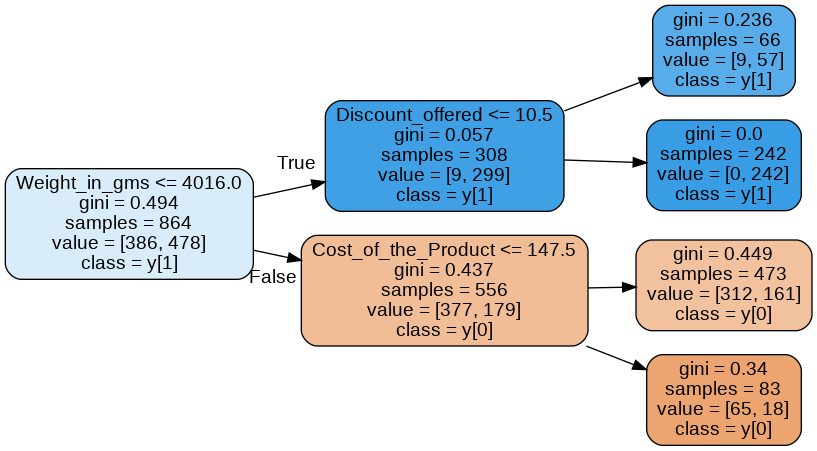

In [ ]:
#l'architecture du premier modéle 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

dot_data = StringIO()

export_graphviz(model1_optimized, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X1.columns,
                class_names=True,
                rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 2.  Formation et optimisation du deuxiéme  modèle:: 

In [ ]:
model2=DecisionTreeClassifier()

In [ ]:
model2.fit(X_train2,y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test2 = model2.predict(X_test2)

In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test2, prediction_test2))

Accuracy =  0.6644736842105263


In [ ]:
optimal_params2 = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=50,
    scoring='accuracy',
    verbose=0)

In [ ]:
#validation croisée 
optimal_params2.fit(X_train2,y_train2)

GridSearchCV(cv=50, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
print(optimal_params2.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [ ]:
model2_optimized=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [ ]:
model2_optimized.fit(X_train2,y_train2)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test2_optimized = model2_optimized.predict(X_test2)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test2, prediction_test2_optimized))

Accuracy =  0.7521929824561403


*** bon résulat parfait ***

In [ ]:
#matrice de confusion 
cm2 = metrics.confusion_matrix(y_test2,prediction_test2_optimized)
print(cm2)

[[204   6]
 [107 139]]


In [ ]:
#sauvegarder le deuxiéme modéle 
filename = '/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 2 optimized acc_75_219.sav'
pickle.dump(model2_optimized, open(filename, 'wb'))

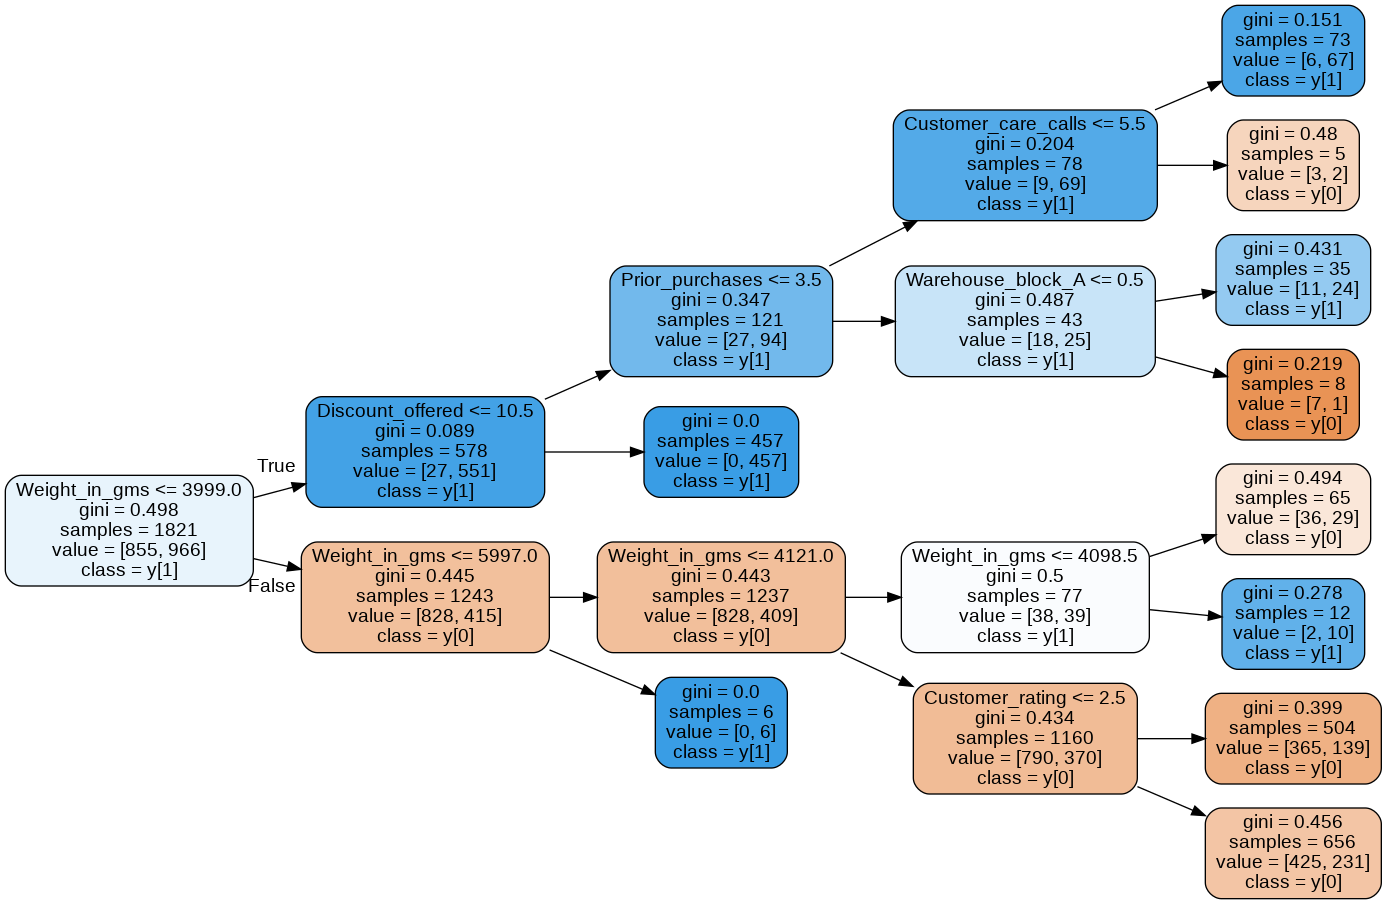

In [ ]:
#architecture du deuxiéme modéle 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

dot_data = StringIO()

export_graphviz(model2_optimized, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X2.columns,
                class_names=True,
                rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 3. Formation et optimisation du troisiéme  modèle:

In [ ]:
model3=DecisionTreeClassifier()

In [ ]:
model3.fit(X_train3,y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test3 = model3.predict(X_test3)

In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test3, prediction_test3))

Accuracy =  0.6158301158301158


In [ ]:
#Validation croisée 
optimal_params3 = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=50,
    scoring='accuracy',
    verbose=0)

In [ ]:
optimal_params3.fit(X_train3,y_train3)

GridSearchCV(cv=50, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
print(optimal_params3.best_params_)

{'criterion': 'gini', 'max_depth': 4}


In [ ]:
model3_optimized=DecisionTreeClassifier(criterion='gini',max_depth=4)

In [ ]:
model3_optimized.fit(X_train3,y_train3)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test3_optimized = model3_optimized.predict(X_test3)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test3, prediction_test3_optimized))

Accuracy =  0.7181467181467182


*** nous remarquons que le troisiéme modéle ne dapasse pas le modéle général ***

In [ ]:
#matrice de confusion 
cm3 = metrics.confusion_matrix(y_test3,prediction_test3_optimized)
print(cm3)

[[261   1]
 [145 111]]


In [ ]:
#sauvegarder le modéle 
filename = '/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 3 optimized acc_71_814.sav'
pickle.dump(model3_optimized, open(filename, 'wb'))

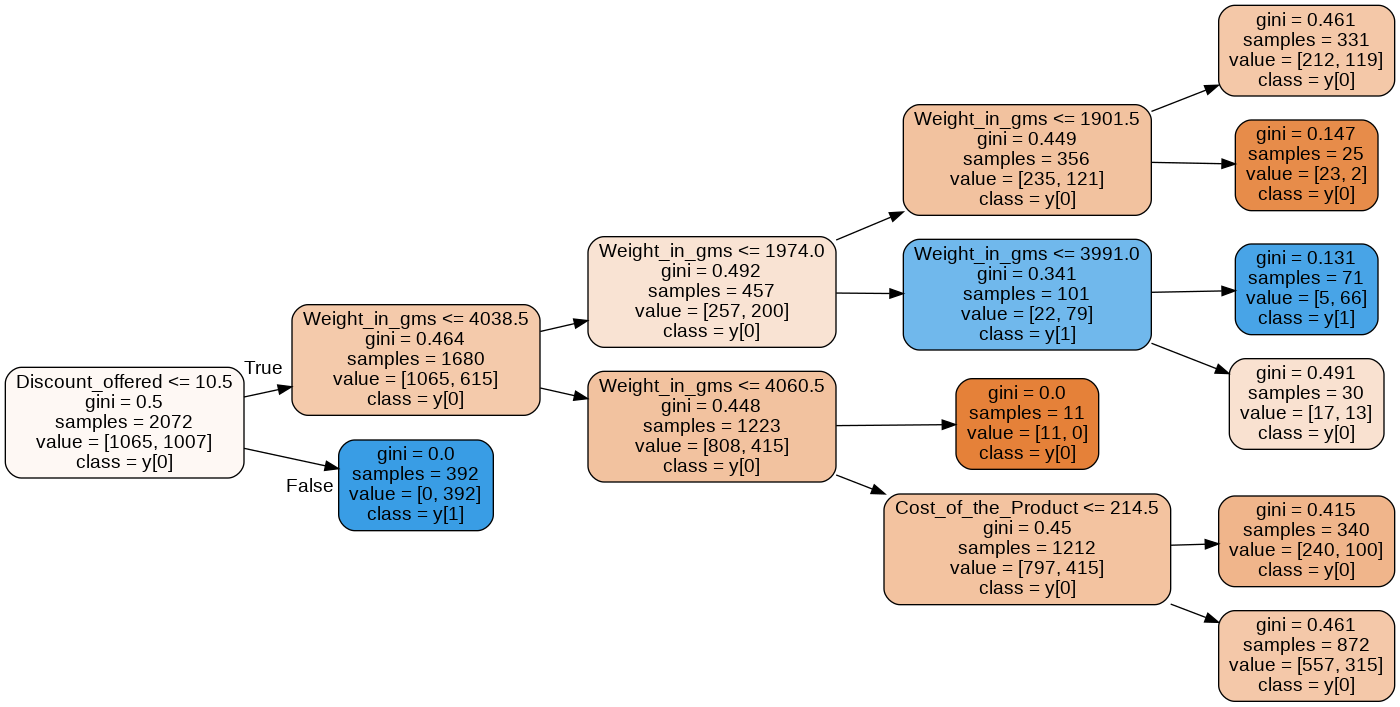

In [ ]:
#L'architecture du troisiéme modéle
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

dot_data = StringIO()

export_graphviz(model3_optimized, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X3.columns,
                class_names=True,
                rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# 4. Formation et optimisation du quatriéme modèle:

In [ ]:
model4=DecisionTreeClassifier()

In [ ]:
model4.fit(X_train4,y_train4)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test4 = model4.predict(X_test4)

In [ ]:
#Accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test4, prediction_test4))

Accuracy =  0.6034063260340633


In [ ]:
#validation croisée 
optimal_params4 = GridSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    cv=50,
    scoring='accuracy',
    verbose=0)

In [ ]:
optimal_params4.fit(X_train4,y_train4)

GridSearchCV(cv=50, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
                 

In [ ]:
print(optimal_params4.best_params_)

{'criterion': 'gini', 'max_depth': 2}


In [ ]:
model4_optimized=DecisionTreeClassifier(criterion='gini',max_depth=2)

In [ ]:
model4_optimized.fit(X_train4,y_train4)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
prediction_test4_optimized = model4_optimized.predict(X_test4)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test4, prediction_test4_optimized))

Accuracy =  0.6496350364963503


*** pareil avec le modéle 3 ***
*** nous constatons que nous allons utiliser la même structure que nous avons fait avec le premier data ***

In [ ]:
#matrice de confusion 
cm4 = metrics.confusion_matrix(y_test4,prediction_test4_optimized)
print(cm4)

[[227   0]
 [144  40]]


In [ ]:
#sauvegarder le modéle 
filename = '/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 4 optimized acc_64_963.sav'
pickle.dump(model4_optimized, open(filename, 'wb'))

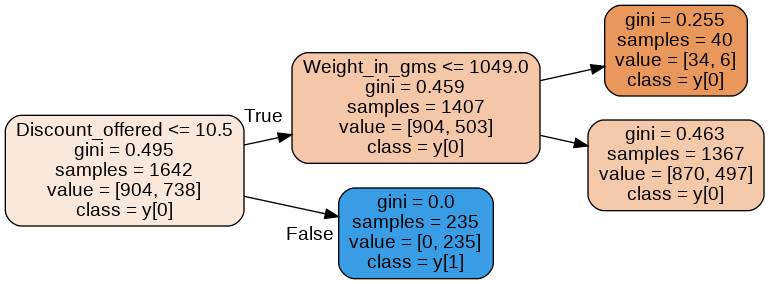

In [ ]:
#Architecture du dernier modéle

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus as pydot

dot_data = StringIO()

export_graphviz(model4_optimized, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names=X4.columns,
                class_names=True,
                rotate=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

à partir des expérimentations ci-dessus, nous voyons que le contexte comprend que la précision des modèles dépasse le modèle général où le coût du produit est compris entre 96 et 200 ([96,200]) mais que la précision générale du modèle l'emporte lorsque le coût du produit est compris entre 201 et 310 ([201 310]).
***
dans les cellules qui suivent, nous allons essayer de tester nos modèles de prise de conscience des contextes avec le modèle général sur le même ensemble de tests que nous avons testé dans le modèle général et voir si la précision augmentera.
***

In [ ]:
X=df_encoded.drop('Reached.on.Time_Y.N',axis=1).copy()

Y=df_encoded['Reached.on.Time_Y.N'].copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=35)

In [ ]:
df_test = X_test

In [ ]:
df_test.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
8334,6,4,275,4,1,1,10,1005,0,0,0,1,0,0,1,0
8438,6,5,246,5,3,0,3,4660,1,0,0,0,0,0,0,1
3086,3,2,223,2,1,1,64,3595,1,0,0,0,0,0,0,1
8592,4,1,167,4,3,1,7,5264,0,0,0,1,0,0,0,1
10819,4,4,249,3,2,0,4,5809,0,0,0,0,1,1,0,0


In [ ]:
y_test.head()

8334     0
8438     1
3086     1
8592     0
10819    1
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
df_test['Reached.on.Time_Y.N']=y_test

In [ ]:
df_test.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Reached.on.Time_Y.N
8334,6,4,275,4,1,1,10,1005,0,0,0,1,0,0,1,0,0
8438,6,5,246,5,3,0,3,4660,1,0,0,0,0,0,0,1,1
3086,3,2,223,2,1,1,64,3595,1,0,0,0,0,0,0,1,1
8592,4,1,167,4,3,1,7,5264,0,0,0,1,0,0,0,1,0
10819,4,4,249,3,2,0,4,5809,0,0,0,0,1,1,0,0,1


In [ ]:
df_test_1=df_test.loc[(df['Cost_of_the_Product'] <=150 ) ]
df_test_2=df_test.loc[(df['Cost_of_the_Product'] >150 ) & (df['Cost_of_the_Product'] <=200)]
df_test_3=df_test.loc[(df['Cost_of_the_Product'] >200 )]

In [ ]:
X1_test = df_test_1.drop("Reached.on.Time_Y.N", axis = 1)
Y1_test = df_test_1['Reached.on.Time_Y.N']

X2_test = df_test_2.drop("Reached.on.Time_Y.N", axis = 1)
Y2_test = df_test_2['Reached.on.Time_Y.N']

X3_test = df_test_3.drop("Reached.on.Time_Y.N", axis = 1)
Y3_test = df_test_3['Reached.on.Time_Y.N']

In [ ]:
X1_test_train1, X1_test_test1, Y1_test_train1, Y1_test_test1 = train_test_split(X1_test, Y1_test, test_size=0.2, random_state=35)

X2_test_train2, X2_test_test2, Y2_test_train2, Y2_test_test2 = train_test_split(X2_test, Y2_test, test_size=0.2, random_state=35)

X3_test_train3, X3_test_test3, Y3_test_train3, Y3_test_test3 = train_test_split(X3_test, Y3_test, test_size=0.2, random_state=35)


In [ ]:
CA_model1=pickle.load(open('/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 1 optimized acc_76_851.sav', 'rb'))
CA_model2=pickle.load(open('/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 2 optimized acc_75_219.sav', 'rb'))
G_model=pickle.load(open('/content/Drive/MyDrive/e-comerce model/model3_DecisionTree_ecommerce_73-93.sav', 'rb'))

In [ ]:
prediction_test_test1 = CA_model1.predict(X1_test_test1)

prediction_test_test2 = CA_model2.predict(X2_test_test2)

prediction_test_test3 = G_model.predict(X3_test_test3)

In [ ]:
print ("Accuracy of first model = ", metrics.accuracy_score(Y1_test_test1, prediction_test_test1))

print ("Accuracy of second model = ", metrics.accuracy_score(Y2_test_test2, prediction_test_test2))

print ("Accuracy of third model = ", metrics.accuracy_score(Y3_test_test3, prediction_test_test3))

Accuracy of first model =  0.7619047619047619
Accuracy of second model =  0.7717391304347826
Accuracy of third model =  0.6808510638297872


In [ ]:
overall_acc = (metrics.accuracy_score(Y1_test_test1, prediction_test_test1)+metrics.accuracy_score(Y2_test_test2, prediction_test_test2)+metrics.accuracy_score(Y3_test_test3, prediction_test_test3))/3


In [ ]:
print ("The Overall Accuracy of combined models = ", overall_acc)

The Overall Accuracy of combined models =  0.7381649853897773


***
à partir des expériences ci-dessus, nous voyons que la précision globale n'a pas dépassé la précision du modèle général (73,81 <73,93).
***
la précision du modèle général sur ce sous-ensemble est trop faible, nous allons donc essayer de diviser les données sur 4 sous-ensembles et utiliser les trois premiers modèles des modèles de prise de conscience du contexte et le modèle général et voir si cette combinaison nous apporte des améliorations.
***
la séparation sera la suivante:
1. coût du produit [96,150]: modèle de prise de conscience du contexte 1.
2. coût du produit [151 200]: modèle de prise de conscience du contexte 2.
3. coût du produit [201 250]: modèle de prise de conscience du contexte 3.
4. coût du produit [251,310]: modèle général.
****

In [ ]:
df_test_1=df_test.loc[(df['Cost_of_the_Product'] <=150 ) ]
df_test_2=df_test.loc[(df['Cost_of_the_Product'] >150 ) & (df['Cost_of_the_Product'] <=200)]
df_test_3=df_test.loc[(df['Cost_of_the_Product'] >200 ) & (df['Cost_of_the_Product'] <=250 )]
df_test_4=df_test.loc[(df['Cost_of_the_Product'] >250 )]

In [ ]:
X1_test = df_test_1.drop("Reached.on.Time_Y.N", axis = 1)
Y1_test = df_test_1['Reached.on.Time_Y.N']

X2_test = df_test_2.drop("Reached.on.Time_Y.N", axis = 1)
Y2_test = df_test_2['Reached.on.Time_Y.N']

X3_test = df_test_3.drop("Reached.on.Time_Y.N", axis = 1)
Y3_test = df_test_3['Reached.on.Time_Y.N']

X4_test = df_test_4.drop("Reached.on.Time_Y.N", axis = 1)
Y4_test = df_test_4['Reached.on.Time_Y.N']

In [ ]:
X1_test_train1, X1_test_test1, Y1_test_train1, Y1_test_test1 = train_test_split(X1_test, Y1_test, test_size=0.2, random_state=35)

X2_test_train2, X2_test_test2, Y2_test_train2, Y2_test_test2 = train_test_split(X2_test, Y2_test, test_size=0.2, random_state=35)

X3_test_train3, X3_test_test3, Y3_test_train3, Y3_test_test3 = train_test_split(X3_test, Y3_test, test_size=0.2, random_state=35)

X4_test_train4, X4_test_test4, Y4_test_train4, Y4_test_test4 = train_test_split(X4_test, Y4_test, test_size=0.2, random_state=35)

In [ ]:
CA_model1=pickle.load(open('/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 1 optimized acc_76_851.sav', 'rb'))
CA_model2=pickle.load(open('/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 2 optimized acc_75_219.sav', 'rb'))
CA_model3=pickle.load(open('/content/Drive/MyDrive/context awareness models/Shipment tracking models/DT/model 3 optimized acc_71_814.sav', 'rb'))
G_model=pickle.load(open('/content/Drive/MyDrive/e-comerce model/model3_DecisionTree_ecommerce_73-93.sav', 'rb'))

In [ ]:
prediction_test_test1 = CA_model1.predict(X1_test_test1)

prediction_test_test2 = CA_model2.predict(X2_test_test2)

prediction_test_test3 = CA_model3.predict(X3_test_test3)

prediction_test_test4 = G_model.predict(X4_test_test4)

In [ ]:
print ("Accuracy of first model = ", metrics.accuracy_score(Y1_test_test1, prediction_test_test1))

print ("Accuracy of second model = ", metrics.accuracy_score(Y2_test_test2, prediction_test_test2))

print ("Accuracy of third model = ", metrics.accuracy_score(Y3_test_test3, prediction_test_test3))

print ("Accuracy of fourth model = ", metrics.accuracy_score(Y4_test_test4, prediction_test_test4))

Accuracy of first model =  0.7619047619047619
Accuracy of second model =  0.7717391304347826
Accuracy of third model =  0.7407407407407407
Accuracy of fourth model =  0.7375


In [ ]:
overall_acc = (metrics.accuracy_score(Y1_test_test1, prediction_test_test1)+metrics.accuracy_score(Y2_test_test2, prediction_test_test2)+metrics.accuracy_score(Y3_test_test3, prediction_test_test3)+metrics.accuracy_score(Y4_test_test4, prediction_test_test4))/4


In [ ]:
print ("The Overall Accuracy of combined models = ", overall_acc)

The Overall Accuracy of combined models =  0.7529711582700713


à partir des dernières expériences, nous avons constaté des améliorations de la précision lorsque nous avons utilisé une approche de sensibilisation au contexte
de 73% à 75%.
ce n'est pas tellement, peut-être que si nous utilisions différents ensembles de données ou colonnes de contexte ou même une division différente, nous pourrions avoir plus de précision, mais cela prouve toujours l'efficacité de l'utilisation de la conscience du contexte dans l'apprentissage automatique et l'intelligence artificielle en général.